In [1]:
import cv2 # Lee las imagenes jpg
import re
import random # Crea Numeros aleatores
import pandas as pd
import numpy as np
from scipy.spatial.distance import directed_hausdorff
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from skimage.measure import  compare_ssim
from collections import Counter
import itertools as it

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['faces','outliers']#classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


In [2]:
#List all image files
import glob
image_list = []
base1='input/faces94/*'
male=[]
female=[]
n_im=0
for root1 in glob.glob(base1):
    base2=root1+'/*'
    for (root2) in glob.glob(base2):
        base3=root2+'/*.jpg'
        for (root3) in glob.glob(base3):
            image_list.append(root3)
            if('/male/'in root3):
                male.append(n_im)
            if('/female/'in root3):
                female.append(n_im)
            if('/malestaff/'in root3):
                male.append(n_im)
            n_im+=1

# Make a whole matrix with all dataset 180x180*num_images
data_set=np.zeros((len(image_list),180,180))
for image in range(len(image_list)):
    data_set[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(image_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)

outlier_list = []
base1='input/Outliers/*'
for root1 in glob.glob(base1):
    outlier_list.append(root1)
    
data_set_out=np.zeros((len(outlier_list),180,180))
for image in range(len(outlier_list)):
    data_set_out[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(outlier_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)


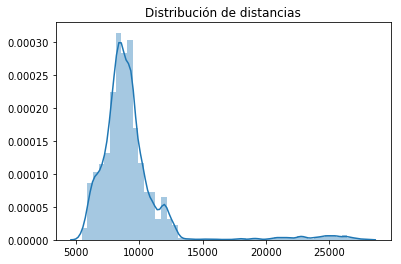

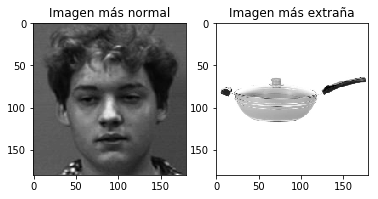

Normalized confusion matrix


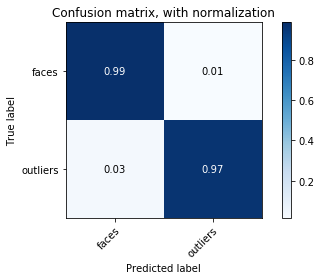

In [4]:
data_set_aum=np.append(data_set,data_set_out,axis=0)
cero=np.mean(data_set_aum, axis=0)
distances=np.linalg.norm(data_set_aum-cero, ord=None, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show();

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show();



LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')


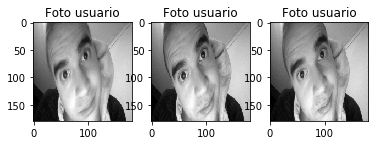

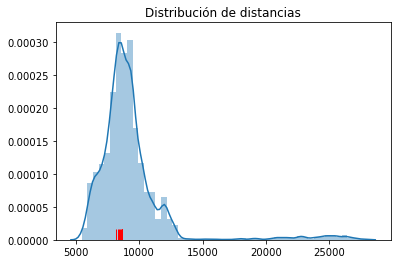

In [13]:
camera = cv2.VideoCapture(0)
for i in range(10):
    return_value, image = camera.read()
    cv2.imwrite('user_photo/user'+str(i)+'.png', image)
del(camera)


user_list = []
base1='user_photo/*'
male=[]
female=[]
n_im=0
for root1 in glob.glob(base1):
    user_list.append(root1)
data_set_user=np.zeros((len(user_list),180,180))

for image in range(len(user_list )):
    data_set_user[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(user_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)
    
distances_user=np.linalg.norm(data_set_user-cero, ord=None, axis=(1,2), keepdims=False)



fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(data_set_user[0,:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Foto usuario')
#plt.show()

axs[1].imshow(data_set_user[1,:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Foto usuario')

axs[2].imshow(data_set_user[2,:,:], cmap = plt.cm.gray) #check
axs[2].set_title('Foto usuario')
plt.show();



sns.distplot(distances)
sns.rugplot(distances_user,color="r")
plt.title('Distribución de distancias')
plt.show();
